In [1]:
from PIL import Image
from IPython.display import display
import cv2
import torch
import math 
import os
from matplotlib import pyplot as plt
import functions.utils_rotate as utils_rotate
import functions.helper as helper
from ultralytics import YOLO

In [2]:
yolo_LP_detect = YOLO('models/LPD_nano.pt')
yolo_license_plate = YOLO('models/ocr_nano.pt')

# set model confidence threshold 
# yolo_LP_detect.conf = 0.6
yolo_license_plate.conf = 0.60

In [8]:
img_file = "test_image/3.jpg"
img = cv2.imread(img_file)
plates = yolo_LP_detect(img)


0: 416x640 1 license_plate, 112.5ms
Speed: 5.0ms preprocess, 112.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


In [9]:
list_plates = plates[0].boxes.xyxy.cpu().numpy()
list_read_plates = set()
count = 0
if len(list_plates) == 0:
    lp = helper.read_plate(yolo_license_plate,img)
    if lp != "unknown":
        list_read_plates.add(lp)
else:
    for plate in list_plates:
        flag = 0
        x = int(plate[0]) # xmin
        y = int(plate[1]) # ymin
        w = int(plate[2] - plate[0]) # xmax - xmin
        h = int(plate[3] - plate[1]) # ymax - ymin  
        crop_img = img[y:y+h, x:x+w]
        cv2.rectangle(img, (int(plate[0]),int(plate[1])), (int(plate[2]),int(plate[3])), color = (0,0,225), thickness = 2)
        cv2.imwrite("crop.jpg", crop_img)
        rc_image = cv2.imread("crop.jpg")
        lp = ""
        count+=1
        for cc in range(0,2):
            for ct in range(0,2):
                lp = helper.read_plate(yolo_license_plate, utils_rotate.deskew(crop_img, cc, ct))
                if lp != "unknown":
                    list_read_plates.add(lp)
                    cv2.putText(img, lp, (int(plate[0]), int(plate[1]-10)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
                    flag = 1
                    break
            if flag == 1:
                break


0: 384x640 1 0, 1 1, 3 3s, 1 8, 1 9, 1 A, 125.1ms
Speed: 3.0ms preprocess, 125.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


{'30A33918'}


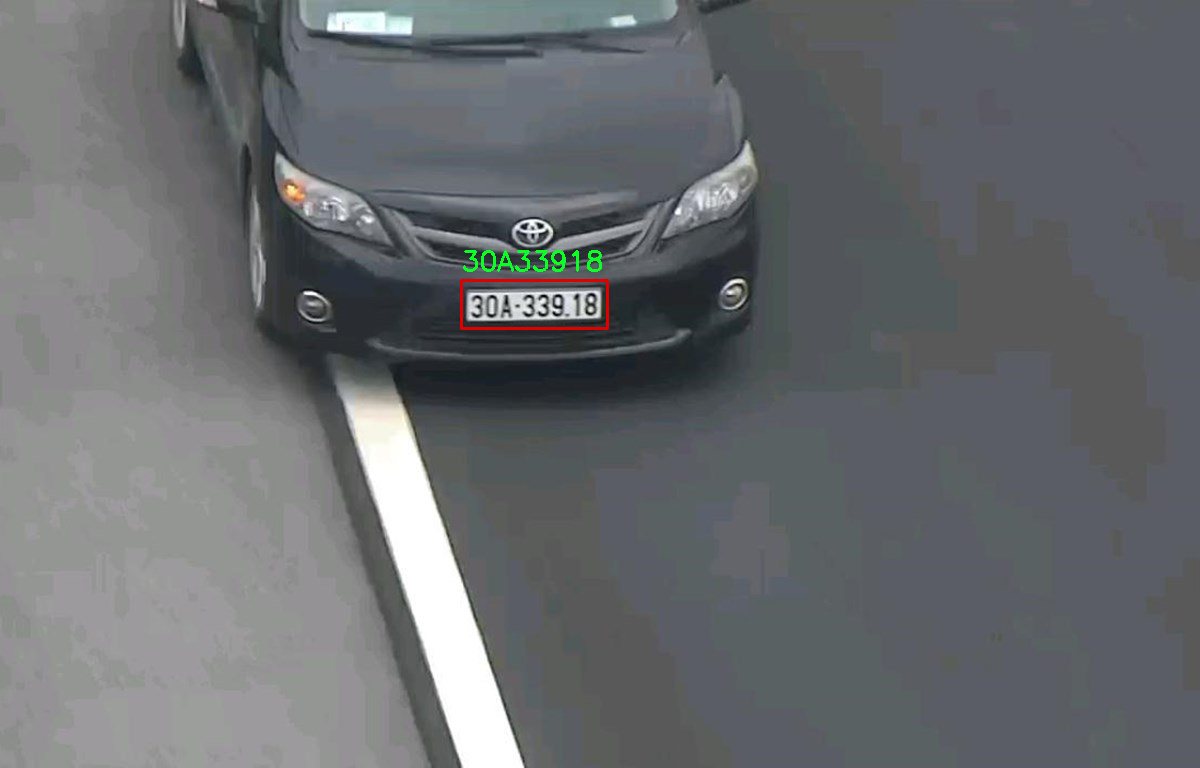

In [10]:
print(list_read_plates)
display(Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))

### Nháp

In [6]:
img1 = cv2.imread('test_image/22.png')

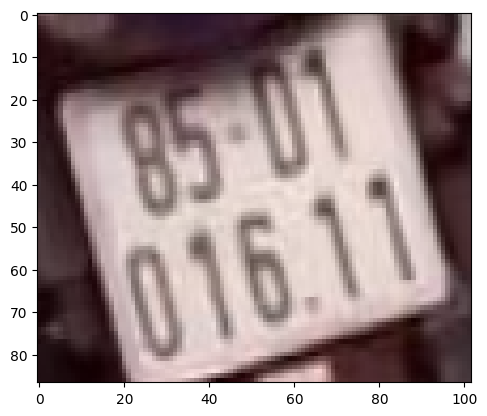

In [7]:
plt.imshow(img1)

In [8]:
results = yolo_license_plate(img1)


0: 576x640 1 0, 3 1s, 1 5, 1 6, 2 7s, 1 8, 1 U, 155.2ms
Speed: 6.1ms preprocess, 155.2ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


In [18]:

res = results[0].boxes.xyxy.cpu()
res[0][0]

tensor(20.8463)

In [24]:
characters = results[0].boxes.cls.cpu()
characters[0]

tensor(0.)

In [16]:
results[0].boxes[0]

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.8693])
data: tensor([[20.8463, 54.2524, 34.7154, 81.8796,  0.8693,  0.0000]])
id: None
is_track: False
orig_shape: (87, 102)
shape: torch.Size([1, 6])
xywh: tensor([[27.7808, 68.0660, 13.8691, 27.6272]])
xywhn: tensor([[0.2724, 0.7824, 0.1360, 0.3176]])
xyxy: tensor([[20.8463, 54.2524, 34.7154, 81.8796]])
xyxyn: tensor([[0.2044, 0.6236, 0.3403, 0.9411]])

In [10]:
class_names = yolo_license_plate.names

for result in results:
    for box in result.boxes:
        class_id = int(box.cls)  # Class ID
        class_name = class_names[class_id]  # Convert ID to name
        confidence = box.conf  # Confidence score
        print(f"{class_name}")


0
8
5
6
1
7
7
1
1
U
